# Trabalho 1 - área 2: Vibração Natural de uma torre
#### Aluna: Gabriela Penna Bianchin 
#### Cartão: 00312316

In [2]:
#Importação das bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import pickle as pk


### 1. Estrutura
Para a elaboração deste trabalho foi confeccionada uma estrutura em torre, com as características apresentas na figura abaixo, através do software "FTool". A partir dela foi possível montar a matriz de flexibilidade e de rigidez.
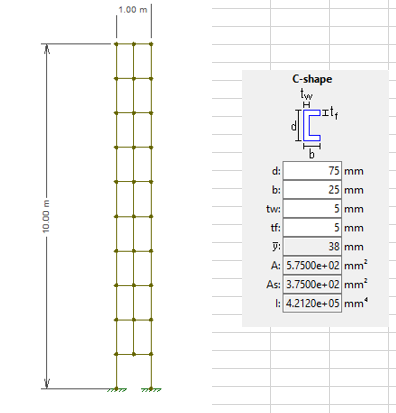
A torre possui 10m e está discretizada em 11 barras de 1m de comprimento. As barras possuem seção transversal U.



### 2. Matriz de Flexibilidade e de Rigidez:
Primeiramente foi elaborada a matriz de flexibilidade "H", através da aplicação de uma força unitária (1kN) em cada um dos 10 nós verticais da estrutura, separadamente. Assim, observa-se que a matriz resultante é simétrica, quadrada de ordem 10.
A Matriz de Rigidez "K" da estrutura é o inverso da matriz de flexibilidade, assim:


In [3]:
#Matriz de flexibilidade em m/N
H1 = np.array ([[0.0006301, 0.0007227, 0.0007325, 0.0007414, 0.0007496, 0.000758, 0.0007663, 0.0007746, 0.0007829, 0.0007912],
                [0.0007227, 0.001283, 0.001386, 0.001423, 0.001457, 0.001491, 0.001525, 0.001559, 0.001593, 0.001626],
                [0.0007325, 0.001386, 0.001971, 0.002119, 0.002199, 0.002275, 0.002351, 0.002427, 0.002503, 0.002579],
                [0.0007414, 0.001423, 0.002119, 0.002766, 0.002973, 0.003112, 0.003247, 0.003383, 0.003518, 0.003653],
                [0.0007496, 0.001457, 0.002199, 0.002973, 0.003696, 0.003979, 0.004194, 0.004405, 0.004616, 0.004828],
                [0.000758, 0.001491, 0.002275, 0.003112, 0.003979, 0.004795, 0.00517, 0.005478, 0.005783, 0.006087],
                [0.0007663, 0.001525, 0.002351, 0.003247, 0.004194, 0.00517, 0.0060996, 0.006582, 0.006999, 0.007414],
                [0.0007746, 0.001559, 0.002427, 0.003383, 0.004405, 0.005478, 0.006582, 0.007634, 0.008246, 0.008791],
                [0.0007829, 0.001593, 0.002503, 0.003518, 0.004616, 0.005783, 0.006999, 0.008246, 0.009442, 0.01021],
                [0.0007912, 0.001626, 0.002579, 0.003653, 0.004828, 0.006087, 0.007414, 0.008791, 0.01021, 0.01156]])*1e-3 

In [4]:
#Matriz de Rigidez em N/m
K1 = np.linalg.inv(H1) 

### 3. Matriz de Massa Concentrada
A matriz de massa concentrada trata-se de uma aproximação da matriz de massa consistente, mas mais simples de ser elaborada, pois é uma matriz diagonal, cujos termos são obtidos através da área de influência de cada nó da estrutura. Os demais termos, fora da diagonal principal, estão relacionados a rotação e podem ser anulados porque não provocarão nenhuma alteração relevante para o problema.

Assim, estimou-se o valor de 1000 kg/m para a massa distribuida das barras. Como a área de influencia de cada nó contempla 1 metro de barra, o valor associado por nó é 1000 kg.


In [5]:
# Matriz de massa concentrada em kg
M1 = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])*1e3 

### 4. Frequências Naturais e Modos de Vibração
Para obter as frequências naturais deve-se resolver problemas de autovalores e autovetores, por isso é necessário a importação da biblioteca "scipy".

In [6]:
import scipy.linalg as sc

#Cálculo dos autovalores e autovetores

w21, Phi1 = sc.eig(K1, M1)

iw = w21.argsort()     #Autovalores em ordem
w21 = w21[iw]
Phi1 = Phi1[:,iw]

#Cálculo das Frequências Naturais

wk1 = np.sqrt(np.real(w21))

fk1 = wk1/2/np.pi



Frequências naturais mais baixas: 
 f1= 0.767534187389481 hz
 f2= 2.4527697715550514 hz
 f3= 4.663107258875525 hz
 f4= 6.754235775414553 hz



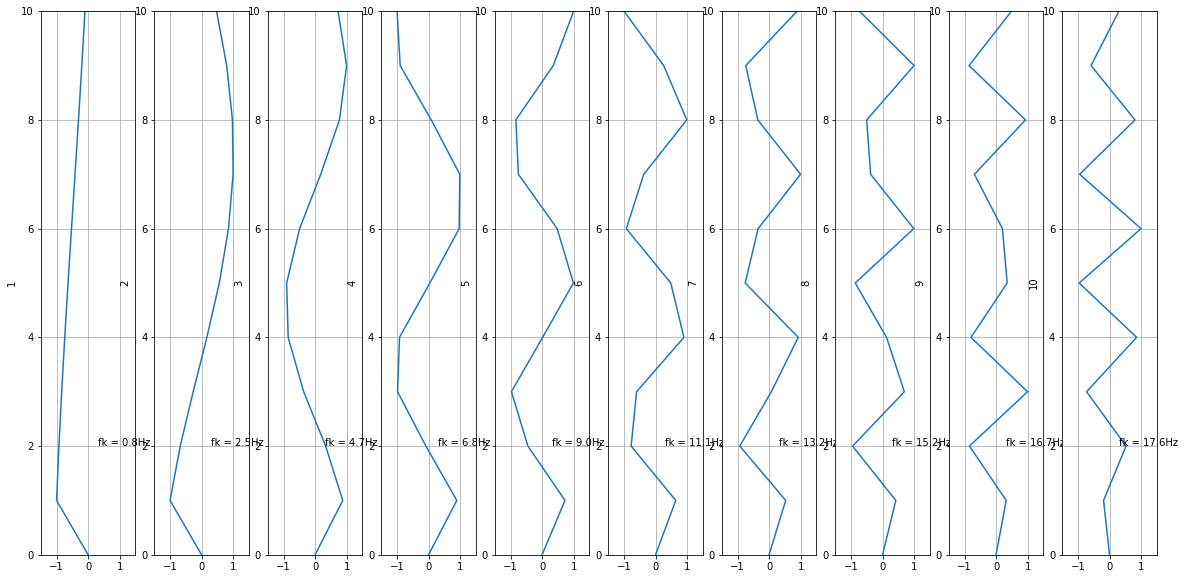

In [7]:
#Obtenção do primeiro modo de vibração e das menores frequências naturais da estrutura
plt.figure(1, figsize=(20,10))
x = np.arange(11)

for k in range(10):
    pk = np.zeros(11)
    pk[1:] = Phi1[::-1,k]
    pk /= np.max(np.abs(pk))   # adjust scale for unity amplitude
    
    plt.subplot(1,10,k+1)
    plt.plot(pk, x)
    
    plt.xlim(-1.5, 1.5);  plt.ylabel(str(k+1));
    plt.ylim( 0.0, 10.0);
    plt.text( 0.3, 2.0, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

print("Frequências naturais mais baixas: \n", "f1=", fk1[0], "hz\n","f2=", fk1[1], "hz\n","f3=", fk1[2], "hz\n", "f4=", fk1[3], "hz\n");

### 5.Resposta da Estrutura a uma Força impulsiva:
Considerando uma força de 100 kN, atuante durante o invervalo de 0 a td, com td=Tn/4 e Tn correspondente ao menor período relacionado as frequências naturais de vibração, apresentadas anteriormente. 
Pode-se utilizar a resolução da "resposta impulsiva", ou seja, considerar a força atuante como um impulso, devido sua curta duração e considerar este impulso como uma velocidade inicial na estrutura. 
A partir deste ponto, monta-se o vetor velocidade da estrutura:
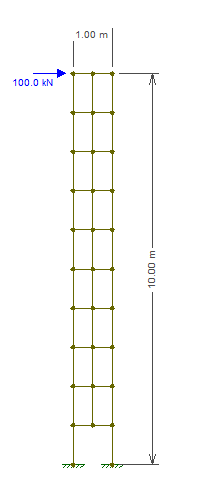

In [8]:
#A frequência natural de vibração utilizada deve ser a menor, ou seja, do primeiro modo
fmax = np.max(fk1)
print ("Frequência Máxima = ", fmax, "Hz")
#A força deve ser expressa em N
F1 = 100000
#Cálculo do Tn
Tn=1/fmax
#Obtenção do td (tempo de duração)
td = Tn/4
#Massa considerada anteriormente (kg)
m = 1000
#Cálculo da velocidade inicial na estrutura
vo = F1*td/m
print("vo =", vo, "m/s")

vo_v=[0,0,0,0,0,0,0,0,0, vo] #Aplicada no ponto mais alto (nó 10)
uo_v = np.zeros(10)

Frequência Máxima =  17.559441857897344 Hz
vo = 1.4237354582404491 m/s


O sistema de equações representado a seguir permite obter os ângulos de fase e as amplitudes para os nós. 
Considerando o deslocamento inicial nulo, o ângulo resultará em 270°.

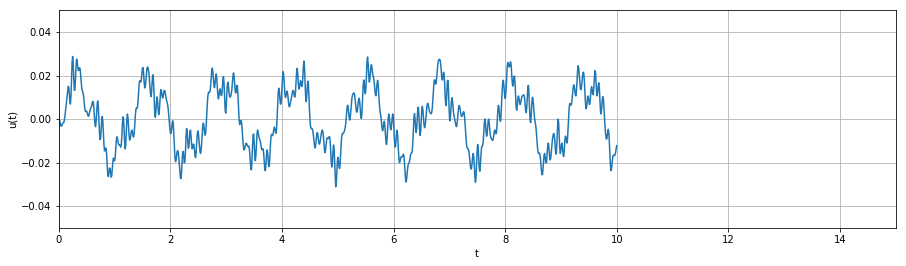

In [52]:
Phit=Phi1
for k in range(9):
    Phit[k]=Phi1[k].transpose() #Transpostas dos autovalores

xi = np.pi/2
Umax = np.zeros(10) 

for k in range (10):
    
    Mi = np.dot(np.dot(Phit[k], M1[k,k]), Phi1[k])
    umax = (np.dot(np.dot(Phit[k], M1[k,k]), vo_v))/(wk1[k]*np.sin(xi)*Mi)
    Umax[k]= umax

#Vetor representativo do tempo
t = np.linspace (0,10,1000)
#Criação de uma matriz 10x1000 para receber os valores dos deslocamentos
uk = np.zeros ((10,1000))

for k in range(10):
    uk[k,:]=Umax[k]*np.cos(-wk1[k]*t - np.pi/2)

#Produto dos autovalores pela matriz de deslocamentos
u = np.dot(Phi1,uk)

plt.figure(2, figsize=(15,4))
plt.plot(t,u[8,:]) #Maior deslocamento é o nó 9
plt.xlim(0.0, 15.0); plt.xlabel("t");
plt.ylim(-0.05,0.05); plt.ylabel ("u(t)")
plt.grid (True)

### 6. Aplicação do amortecimento
O método Rayleigh é utilizado para cálculo do amortecimento, visto que a matriz de amortecimento é uma combinação linear das matrizes de massa e rigidez.
O amortecimento inicial é considerado como 1%.

In [83]:
zeta=np.zeros(10)
zeta[0]=0.01
zeta[1]=0.01
alfa1=2*(zeta[0]*wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0=2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (8):
    zeta[k+2]=(alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)
print ("Vetor Zeta = ", zeta)

Vetor Zeta =  [0.01       0.01       0.01212002 0.01934436 0.02657175 0.03359442
 0.04025643 0.04635103 0.05110474 0.05390047]
